# Logistic Regression

## Code implementation

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math

Define the function $ f_{\pmb{w}, b} $ as the sigmoid function $ g(z) = \frac{1}{1 + e^{-z}} $ with $ z = \pmb{w} * \pmb{x} + b $: 
$$
f_{\pmb{w}, b}(x) = \frac{1}{1 + e^{-(\pmb{w} * \pmb{x} + b)}}
$$


In [2]:
def f_x(x, w, b):
    z = np.dot(x, w) + b
    return 1 / (1 + math.exp(-z))

### Cost function
Define the cost function as the simplefied loss function with regularization:
$$
J(\pmb{w}, b) = - \frac{1}{m} \sum_{i=1}^{m}[y^{(i)} \log(f_{\pmb{w}, b}(\pmb{x}^{(i)})) + (1 - y^{(i)}) \log(1 - f_{\pmb{w}, b}(\pmb{x}^{(i)}))] + \frac{\lambda}{2m}  \sum_{j=1}^{n} w_j^2 \tag{1}
$$

In [3]:
def cost_fun(X, y, w, b, lambda_):
    m, n = X.shape
    cost = 0
    for i in range(m):
        f = f_x(X[i], w, b)
        err = y[i] * math.log(f) + (1 - y[i]) * math.log(1 - f)
        cost += err
    cost = - cost / m
    # Regularization
    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = (lambda_/(2*m)) * reg_cost 
    # Total cost
    cost = cost + reg_cost
    return cost

### Gradient descent algorithm
repeat each iteration:
$$ \pmb{w} = \pmb{w} - \alpha \frac{\partial}{\partial \pmb{w}}J(\pmb{w}, b) $$
$$ b = b - \alpha \frac{\partial}{\partial b}J(\pmb{w}, b) $$

Cost derivatives:
$$
\frac{\partial}{\partial \pmb{w}}J(\pmb{w}, b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)}) \pmb{x}^{(i)} +  \frac{\lambda}{m} w_j \tag{2} 
$$
$$
\frac{\partial}{\partial b}J(\pmb{w}, b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)})
$$

In [4]:
def cost_derivative(X, y, w, b, lambda_):
    m, n = X.shape
    dj_w = np.zeros(n)
    dj_b= 0
    for i in range(m):
        err = f_x(X[i], w, b) - y[i]
        dj_w += err * X[i]
        dj_b += err
    dj_w = dj_w / m
    dj_b = dj_b / m
    
    dj_w = dj_w + (lambda_/m) * w  # Regularization
    
    return dj_w, dj_b


In [5]:
def iter_print(iter, w, b, cost):
    print(f'Iter: {iter} - w: {w}, b: {b}, cost: {cost}')

def gradient_decent(X, y, w, b, alpha, iterations, lambda_):
    history = []
    for i in range(iterations+1):
        dj_w, dj_b = cost_derivative(X, y, w, b, lambda_)  # Calclate derivatives
        # Set new paramiters
        w = w - alpha*dj_w 
        b = b - alpha*dj_b
        if i % 100 == 0:  # Every 100 iterations save the paramiters and cost
            cost = cost_fun(X, y, w, b, lambda_)
            iter_print(i, w, b, cost) # Print iteration
            history.append([w, b, cost])
    return w, b, history
    

### Feature Scaling
Perform some transformation on the traning data to have a similar scale

Z-score normalization:
$$ x_i = \frac{x_i - \mu_i}{\sigma_i}

In [6]:
def z_score (x):
    mu = np.mean(x)
    sdt = np.std(x)
    x = (x - mu) / sdt
    return x, mu, sdt
    

## Test algorthm

Data creation and plotting

In [7]:
def get_data(m, n): # Create training data from the function y = X^2
    np.random.seed(2)
    X_train = 2*(np.random.rand(m,n)-[0.5,0.5])
    y_train = X_train[:,1]+0.5  > X_train[:,0]**2 + 0.5*np.random.rand(m) #quadratic + random
    y_train = y_train + 0  #convert from boolean to integer
    
    return X_train, y_train


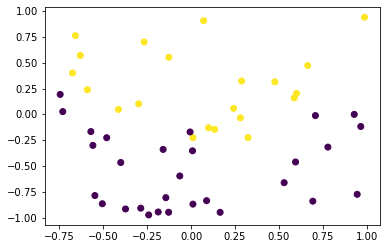

In [8]:
m = 50
n = 2
x_train, y_train = get_data(m, n)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

Run gradient descent

In [46]:
X_train = np.c_[x_train] # Engineer feature
# Initialize values
w = np.zeros(X_train[0].shape)
b = 0
alpha = 1e-1
iter = 1000

model_w, model_b, history = gradient_decent(X_train, y_train, w, b, alpha, iter, 1) # Run gradient decent

Iter: 0 - w: [0.00081817 0.02138855], b: -0.008, cost: 0.687964896128408
Iter: 100 - w: [0.06193447 1.35080292], b: -0.14447657721626767, cost: 0.49146149683763574
Iter: 200 - w: [0.09342745 1.94640228], b: -0.06281208777296868, cost: 0.45396917977204043
Iter: 300 - w: [0.11152481 2.26228646], b: -0.010928012366468554, cost: 0.4434237073761635
Iter: 400 - w: [0.12264254 2.44128553], b: 0.01826112220175515, cost: 0.44004919530474884
Iter: 500 - w: [0.12964556 2.54606244], b: 0.0349271702261459, cost: 0.438895887382249
Iter: 600 - w: [0.13408889 2.60848028], b: 0.04465562088717164, cost: 0.43848717667645093
Iter: 700 - w: [0.13690806 2.64603848], b: 0.05042727306516958, cost: 0.43833929741582817
Iter: 800 - w: [0.13869153 2.66877162], b: 0.053887893523267796, cost: 0.43828513467824615
Iter: 900 - w: [0.1398154  2.68258007], b: 0.055976757239015545, cost: 0.4382651517575956
Iter: 1000 - w: [0.14052078 2.69098545], b: 0.05724290444181643, cost: 0.43825774676311186


Run Gradient descednt with feature scaling

In [34]:
x_train_norm, mu, sdt = z_score(x_train) # Get traninge set normalized

X_train_norm = np.c_[x_train_norm, x_train_norm**2] # Engineer feature
# Initialize values
w = np.zeros(X_train_norm[0].shape)
b = 0
alpha = 1e0
iter = 1000

model_norm_w, model_norm_b, history = gradient_decent(X_train_norm, y_train, w, b, alpha, iter, 1) # Run gradient decent

Iter: 0 - w: [ 0.00336067  0.3903864  -0.11451183 -0.15033406], b: -0.08, cost: 0.5455537910867526
Iter: 100 - w: [ 0.66075389  2.54741529 -1.08688283 -0.04685355], b: 0.8089495487951084, cost: 0.2921831965758853
Iter: 200 - w: [ 0.67156075  2.56632089 -1.10790324 -0.05187639], b: 0.8369074849134895, cost: 0.29215060731772324
Iter: 300 - w: [ 0.67183739  2.56680634 -1.10844692 -0.05201635], b: 0.8376390358604566, cost: 0.2921505853901744
Iter: 400 - w: [ 0.67184461  2.566819   -1.1084611  -0.05202001], b: 0.8376581314442342, cost: 0.2921505853752437
Iter: 500 - w: [ 0.67184479  2.56681933 -1.10846147 -0.05202011], b: 0.8376586298134262, cost: 0.2921505853752335
Iter: 600 - w: [ 0.6718448   2.56681934 -1.10846148 -0.05202011], b: 0.8376586428200574, cost: 0.2921505853752335
Iter: 700 - w: [ 0.6718448   2.56681934 -1.10846148 -0.05202011], b: 0.8376586431595092, cost: 0.2921505853752335
Iter: 800 - w: [ 0.6718448   2.56681934 -1.10846148 -0.05202011], b: 0.8376586431683684, cost: 0.29215

### Results plot

No handles with labels found to put in legend.


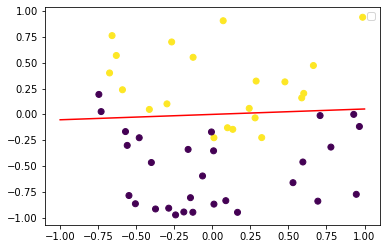

In [49]:

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

x = np.linspace(-1,1,300)
X = np.c_[x]
y = (x * model_w[0] + b) / model_w[1]

plt.plot(x, y, c='r')


plt.legend()
plt.show()
